# NEW STARTUP CODES

# IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model, sklearn.datasets 
from sklearn import kernel_ridge 
print ("Ready")

Ready


In [2]:
from IPython.display import HTML
def pretty_print_df(value_counts_):
  "Quick function to display value counts more nicely"
  display(HTML(pd.DataFrame(value_counts_).to_html()))


# LOADING THE DATASET

In [3]:

url = "./Dataset/big_startup_secsees_dataset.csv" # Creating a path to the file

df = pd.read_csv (url, delimiter=",")

df.head() #Visualising

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


In [4]:
df.tail()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,1587301,operating,CHN,22,Beijing,Beijing,1,NaN,2012-04-01,2012-04-01
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,114304,operating,HRV,15,Split,Split,4,2012-05-13,2011-11-01,2014-03-01
66365,/organization/Áeron,ÁERON,http://www.aeron.hu/,NaN,-,operating,NaN,NaN,NaN,NaN,1,2011-01-01,2014-08-01,2014-08-01
66366,/organization/Ôasys-2,Ôasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,18192,operating,USA,CA,SF Bay Area,San Francisco,1,2014-01-01,2015-01-01,2015-01-01
66367,/organization/İnovatiff-reklam-ve-tanıtım-hizm...,İnovatiff Reklam ve Tanıtım Hizmetleri Tic,http://inovatiff.com,Consumer Goods|E-Commerce|Internet,14851,operating,NaN,NaN,NaN,NaN,1,NaN,2013-10-01,2013-10-01


# INSPECTING THE DATA

In [5]:
# shape of dataset: 
print(df.shape)

# list of column titles 
print(df.columns)

(66368, 14)
Index(['permalink', 'name', 'homepage_url', 'category_list',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'first_funding_at',
       'last_funding_at'],
      dtype='object')


In [6]:
# list of column (field) data types
print(df.dtypes)

permalink            object
name                 object
homepage_url         object
category_list        object
funding_total_usd    object
status               object
country_code         object
state_code           object
region               object
city                 object
funding_rounds        int64
founded_at           object
first_funding_at     object
last_funding_at      object
dtype: object


# EXPLORATORY DATA ANALYSIS (EDA)

# PRE PROCESSING

In [7]:
!pip install squarify
import squarify    
!pip install geopandas

In [8]:
# Summary statistics for numerical features
df.describe()

,funding_rounds
count,66368.000000
mean,1.732522
std,1.360251
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,19.000000


# VIEWING SOME CATEGORICAL COLUMN

In [9]:
# let's list some categorical features
categorical_columns= [  
        'status'
       ]

# let's get the categories and their count for each feature
for col in categorical_columns:
  print(f"Categories and number of occurrences for '{col}'")
  pretty_print_df(df[col].value_counts())
  print()

Categories and number of occurrences for 'status'


,status
operating,53034
closed,6238
acquired,5549
ipo,1547


In [10]:
categorical_columns= [  
        'region'
       ]

# let's get the categories and their count for each feature
for col in categorical_columns:
  print(f"Categories and number of occurrences for '{col}'")
  pretty_print_df(df[col].value_counts())
  print()

Categories and number of occurrences for 'region'


,region
SF Bay Area,8804
New York City,3528
Boston,2378
London,2345
Los Angeles,1877
Seattle,1207
"Washington, D.C.",1035
Chicago,980
San Diego,899
Denver,831


In [11]:
categorical_columns= [  
        'country_code'
       ]

# let's get the categories and their count for each feature
for col in categorical_columns:
  print(f"Categories and number of occurrences for '{col}'")
  pretty_print_df(df[col].value_counts())
  print()

Categories and number of occurrences for 'country_code'


,country_code
USA,37601
GBR,3688
CAN,1925
IND,1596
CHN,1544
FRA,1135
DEU,1082
ISR,965
ESP,746
AUS,503


# CONVERTING THE TOTAL FUNDING TO AN INTEGER FORMAT

In [12]:
df.loc[df.funding_total_usd=='-','funding_total_usd'] = np.nan

In [13]:
# Convert funding_total_usd column from object to integer data type
df['funding_total_usd'] = df['funding_total_usd'].astype(float)


In [14]:
df.describe()

,funding_total_usd,funding_rounds
count,5.358300e+04,66368.000000
mean,1.847860e+07,1.732522
std,1.880133e+08,1.360251
min,1.000000e+00,1.000000
25%,3.356235e+05,1.000000
50%,2.000000e+06,1.000000
75%,1.000000e+07,2.000000
max,3.007950e+10,19.000000


# VIEWING THE NUMBER OF STARTUPS BY STATUS

Text(0, 0.5, 'Number of startups')

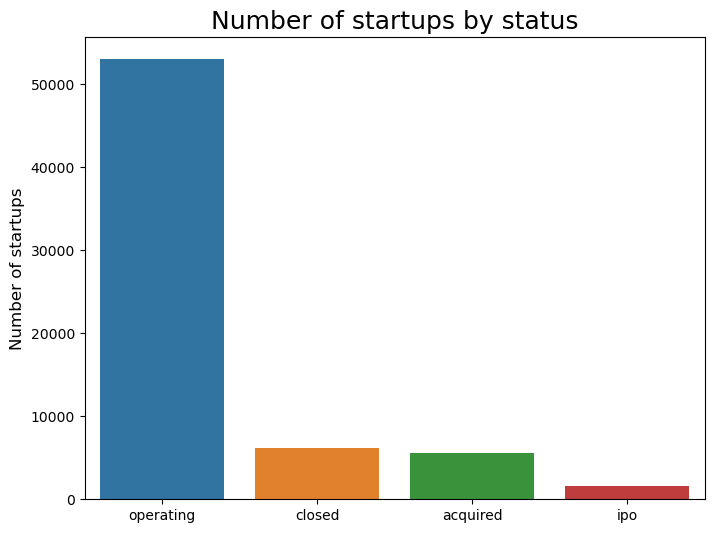

In [15]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['status'].value_counts().index,y=df['status'].value_counts())
plt.title('Number of startups by status',size=18)
plt.ylabel('Number of startups',size=12)

# BY FUNDING ROUNDS

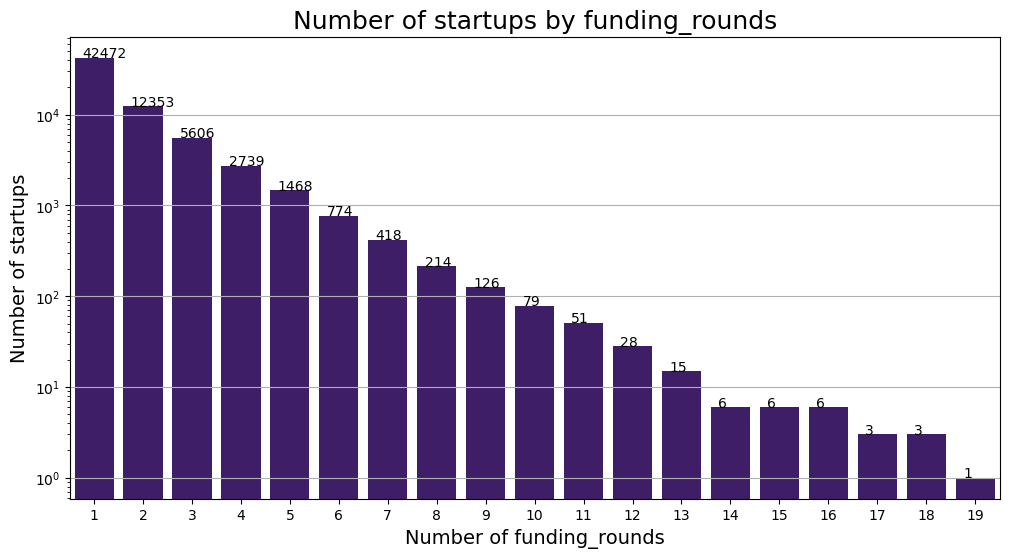

In [16]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['funding_rounds'].value_counts().index, y=df['funding_rounds'].value_counts(), color ='#3c1273')
plt.title('Number of startups by funding_rounds',size=18)
plt.ylabel('Number of startups',size=14)
plt.xlabel('Number of funding_rounds', size=14)
plt.grid(axis='y')
plt.yscale('log')

def addlabels(x,y):
    for i in x:
        plt.text(i-1.25,y[i],y[i])

addlabels(df['funding_rounds'].value_counts().index,df['funding_rounds'].value_counts())

#### seems like all the startup has at least one funding round

# HANDLING MISSING DATA

In [17]:
df.isna().sum()

permalink                0
name                     1
homepage_url          5058
category_list         3148
funding_total_usd    12785
status                   0
country_code          6958
state_code            8547
region                8030
city                  8028
funding_rounds           0
founded_at           15221
first_funding_at        24
last_funding_at          0
dtype: int64

# SIMPLE IMPUTER FOR NUMERIC DATA

In [18]:
# handling missing data
from sklearn.impute import SimpleImputer 

df =  df.copy()

# 1. Imputer
imptr_num = SimpleImputer(missing_values = np.nan, strategy = 'median')  

# 2. Fit the imputer object to the feature matrix (only for numeric features)
numerical_columns = ['funding_total_usd']
imptr_num = imptr_num.fit(df[numerical_columns]) # fit the data to estimate the parameters (here, the average value)

# 3. Call Transform to replace missing data in train_dataset (on specific columns) by the mean of the column to which that missing data belongs to
df[numerical_columns] = \
  imptr_num.transform(df[numerical_columns]) # apply the transformation using the parameters estimated above

# note column ApplicantIncome in the first row --> before it was a missing value!
df.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,2000000.0,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


# FILLING THE COUNTRY CODE WITH RANDOM SAMPLE IMPUTATION

In [19]:
# Let's see the status of startups depending on the country
country = []

for i in df.country_code:
  if not isinstance(i,str):
    country.append(np.random.choice(df.country_code[df.country_code.notnull()]))
  else:
    country.append(i)

df['country'] = country

# CREATING A ONE HOT ENCODING FOR THE STATUS

In [20]:
status = []

for i in df['status']:
    if i in ['acquired','ipo']:
        status.append('high')
    elif i == 'closed':
        status.append('fail')
    else:
        status.append('mid')
        
df['status_class'] = status

In [21]:
status_class = pd.get_dummies(df['status_class'])
df = pd.concat([df,status_class],axis=1)
df.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,country,status_class,fail,high,mid
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05,IND,mid,0,0,1
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,USA,mid,0,0,1
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30,USA,mid,0,0,1
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,CHN,mid,0,0,1
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,2000000.0,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,USA,mid,0,0,1


# CREATING A YEARS COLUMN

In [22]:
years = []

for fou, first in zip(df.founded_at, df.first_funding_at):
  if isinstance(fou,str):
    years.append(int(fou.split('-')[0]))
  elif not isinstance(fou,str) and isinstance(first,str):
    years.append(int(first.split('-')[0]))
  else:
    date = int(np.random.choice(df.founded_at[df.founded_at.notnull()]).split('-')[0])
    years.append(date)

df['year'] = years
df[df.founded_at.isnull()].head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,country,status_class,fail,high,mid,year
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05,IND,mid,0,0,1,2015
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30,USA,mid,0,0,1,2014
5,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,41250.0,operating,HKG,NaN,Hong Kong,Hong Kong,1,NaN,2014-07-01,2014-07-01,HKG,mid,0,0,1,2014
10,/organization/1-4-all,1-4 All,NaN,Entertainment|Games|Software,2000000.0,operating,USA,NC,NC - Other,Connellys Springs,1,NaN,2013-04-21,2013-04-21,USA,mid,0,0,1,2013
28,/organization/100du-tv,100du.tv,http://www.100du.com,Hospitality,3000000.0,operating,CHN,23,Shanghai,Shanghai,2,NaN,2008-01-07,2010-08-13,CHN,mid,0,0,1,2008


# SIMPLIFY THE CATEGORY COLUMN LIST

In [23]:
main_category = []

for i in df['category_list']:
    if not isinstance(i,str):
      main_category.append('Other')
    else:
      main_category.append(i.split('|')[0])

df['main_category'] = main_category
df.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,...,founded_at,first_funding_at,last_funding_at,country,status_class,fail,high,mid,year,main_category
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,...,NaN,2015-01-05,2015-01-05,IND,mid,0,0,1,2015,Media
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,...,2014-09-04,2014-03-01,2014-10-14,USA,mid,0,0,1,2014,Application Platforms
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,NaN,NaN,NaN,NaN,...,NaN,2014-01-30,2014-01-30,USA,mid,0,0,1,2014,Apps
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,...,2007-01-01,2008-03-19,2008-03-19,CHN,mid,0,0,1,2007,Curated Web
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,2000000.0,operating,USA,IL,"Springfield, Illinois",Champaign,...,2010-01-01,2014-07-24,2014-07-24,USA,mid,0,0,1,2010,Software


In [24]:
# let's list all categorical features
categorical_columns= [  
        'main_category'
       ]

# let's get the categories and their count for each feature
for col in categorical_columns:
  print(f"Categories and number of occurrences for '{col}'")
  pretty_print_df(df[col].value_counts())
  print()

Categories and number of occurrences for 'main_category'


,main_category
Biotechnology,4468
Software,4144
Other,3148
E-Commerce,2752
Advertising,2397
Curated Web,2197
Mobile,1776
Analytics,1641
Apps,1502
Health Care,1430


# CREATING A LOCATION TABLE

In [25]:
# Fill NaNs with empty string
df['region'] = df['region'].fillna("")
df['city'] = df['city'].fillna("")

# Combine the 'region' and 'city' columns, without repeating when they are the same
df['location'] = df.apply(lambda row: row['region'] if row['region'] == row['city'] else row['region'] + ', ' + row['city'], axis=1)
df.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,...,first_funding_at,last_funding_at,country,status_class,fail,high,mid,year,main_category,location
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,...,2015-01-05,2015-01-05,IND,mid,0,0,1,2015,Media,Mumbai
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,...,2014-03-01,2014-10-14,USA,mid,0,0,1,2014,Application Platforms,"DE - Other, Delaware City"
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,NaN,NaN,,,...,2014-01-30,2014-01-30,USA,mid,0,0,1,2014,Apps,
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,...,2008-03-19,2008-03-19,CHN,mid,0,0,1,2007,Curated Web,Beijing
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,2000000.0,operating,USA,IL,"Springfield, Illinois",Champaign,...,2014-07-24,2014-07-24,USA,mid,0,0,1,2010,Software,"Springfield, Illinois, Champaign"


In [26]:
df['location'] = df['location'].replace("", np.nan)
df.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,...,first_funding_at,last_funding_at,country,status_class,fail,high,mid,year,main_category,location
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,...,2015-01-05,2015-01-05,IND,mid,0,0,1,2015,Media,Mumbai
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,...,2014-03-01,2014-10-14,USA,mid,0,0,1,2014,Application Platforms,"DE - Other, Delaware City"
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,NaN,NaN,,,...,2014-01-30,2014-01-30,USA,mid,0,0,1,2014,Apps,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,...,2008-03-19,2008-03-19,CHN,mid,0,0,1,2007,Curated Web,Beijing
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,2000000.0,operating,USA,IL,"Springfield, Illinois",Champaign,...,2014-07-24,2014-07-24,USA,mid,0,0,1,2010,Software,"Springfield, Illinois, Champaign"


# SELECT ONLY THE COLUMN NEEDED FOR ANALYSIS

In [30]:
df = df[['name','country','year','location','main_category','funding_total_usd','funding_rounds',
               'first_funding_at','last_funding_at','status','status_class','fail','high','mid']]
df.head()


,name,country,year,location,main_category,funding_total_usd,funding_rounds,first_funding_at,last_funding_at,status,status_class,fail,high,mid
0,#fame,IND,2015,Mumbai,Media,10000000.0,1,2015-01-05,2015-01-05,operating,mid,0,0,1
1,:Qounter,USA,2014,"DE - Other, Delaware City",Application Platforms,700000.0,2,2014-03-01,2014-10-14,operating,mid,0,0,1
2,"(THE) ONE of THEM,Inc.",USA,2014,NaN,Apps,3406878.0,1,2014-01-30,2014-01-30,operating,mid,0,0,1
3,0-6.com,CHN,2007,Beijing,Curated Web,2000000.0,1,2008-03-19,2008-03-19,operating,mid,0,0,1
4,004 Technologies,USA,2010,"Springfield, Illinois, Champaign",Software,2000000.0,1,2014-07-24,2014-07-24,operating,mid,0,0,1


In [31]:
df.isna().sum()

name                    1
country                 0
year                    0
location             8028
main_category           0
funding_total_usd       0
funding_rounds          0
first_funding_at       24
last_funding_at         0
status                  0
status_class            0
fail                    0
high                    0
mid                     0
dtype: int64

## How many startups achieved the high success?

In [32]:
high_success_ratio = df.high.mean()*100
print(f'{df.high[df.high == 1].count()} startups reach high success, what means {high_success_ratio:.2f}% of total')

7096 startups reach high success, what means 10.69% of total


## How many startups achieved the mid success?

In [33]:
mid_success_ratio = df.mid.mean()*100
print(f'{df.mid[df.mid == 1].count()} startups reach mid success, what means {mid_success_ratio:.2f}% of total')

53034 startups reach mid success, what means 79.91% of total


## How many startups failed?

In [34]:
fail_ratio = df.fail.mean()*100
print(f'{df.fail[df.fail == 1].count()} startups fail, what means {fail_ratio:.2f}% of total')


6238 startups fail, what means 9.40% of total


/var/folders/_1/m8z38xzd6hv4d1hlr0776md00000gn/T/ipykernel_901/65503107.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


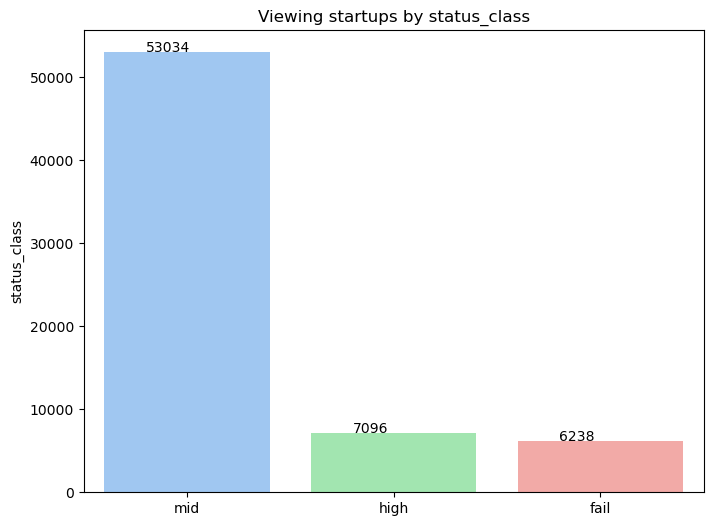

In [35]:
plt.style.use('seaborn-pastel')
plt.figure(figsize=(8,6))
plt.title('Viewing startups by status_class')
sns.barplot(x= df.status_class.value_counts().index, y=df.status_class.value_counts())
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i-.20,y[i],y[i])

addlabels(df.status_class.value_counts().index,df.status_class.value_counts())

# FILTER STARTUPS BY  YEAR
#### Let's see only the startups founded after 1990, cause we want to see if there's a pattern between the most recent startups

In [36]:
df = df[(df.year > 1990) & (df.year < 2023)]
df.count().max()

64859

In [37]:
def group_by_status(column_name):
  # Group by a feature and calculate the fail/success rate
  group = df.groupby(column_name)[['high','mid','fail']].sum()
  group['total'] = group.sum(axis=1)
  group['high_success_ratio'] = group.high/group.total
  group['mid_success_ratio'] = group.mid/group.total
  group['fail_ratio'] = group.fail/group.total
  return group

In [38]:

year_status = group_by_status('year')
year_status.sort_values(by='year', ascending=False).head()

,high,mid,fail,total,high_success_ratio,mid_success_ratio,fail_ratio
year,,,,,,,
2016,0,1,1,2,0.000000,0.500000,0.500000
2015,48,2791,621,3460,0.013873,0.806647,0.179480
2014,151,7155,448,7754,0.019474,0.922750,0.057777
2013,172,7297,358,7827,0.021975,0.932286,0.045739
2012,325,7096,509,7930,0.040984,0.894830,0.064187


We can see a very clear outlier, and it corresponds to the year 2016, this is due to the small amount of the sample (only 2 entries), so the percentage is not representative.

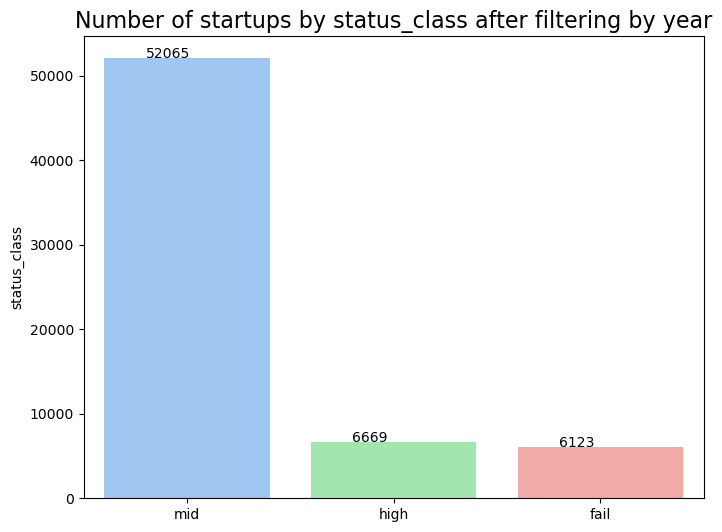

In [39]:
df = df[df.year < 2016]
year_status = year_status[year_status.index < 2016]
plt.figure(figsize=(8,6))
plt.title('Number of startups by status_class after filtering by year', size=16)
sns.barplot(x= df.status_class.value_counts().index, y=df.status_class.value_counts())
addlabels(df.status_class.value_counts().index,df.status_class.value_counts())

In [40]:
print(f'Number of startups: {df.count().max()}')
print(f'{df.high[df.high == 1].count()} startups reached high success, which is {df.high.mean()*100:.2f}% of the total number')
print(f'{df.mid[df.mid == 1].count()} startups reached mid success, which is  {df.mid.mean()*100:.2f}% of the total number')
print(f'{df.fail[df.fail == 1].count()} startups fail, which is {df.fail.mean()*100:.2f}% of the total number')

Number of startups: 64857
6669 startups reached high success, which is 10.28% of the total number
52065 startups reached mid success, which is  80.28% of the total number
6123 startups fail, which is 9.44% of the total number


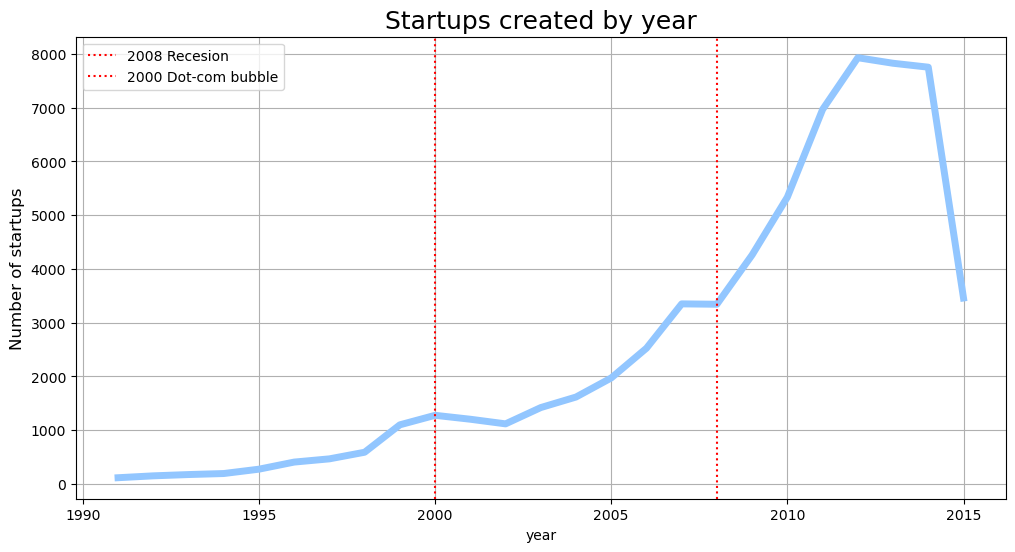

In [41]:
plt.figure(figsize=(12,6))
plt.title('Startups created by year', size=18)
plt.ylabel('Number of startups',size=12)
plt.grid()
sns.lineplot(data=year_status, x=year_status.index, y=year_status.total, linewidth=5)
plt.axvline(x=2008, color="red", label="2008 Recesion",linestyle=':')
plt.axvline(x=2000, color="red", label="2000 Dot-com bubble",linestyle=':')
plt.legend()

We can see in the trend line that there was a clear upward trend in terms of startup creation, with only two setbacks, located in 2000 and 2008, which makes sense, due to the crisis experienced during those years.

However, we can observe a slight drop in 2014 and a huge drop in 2015. This could be explained by the nature of the dataset and the possible lack of entries in the most recent years, as happened in a more extreme way with 2016.

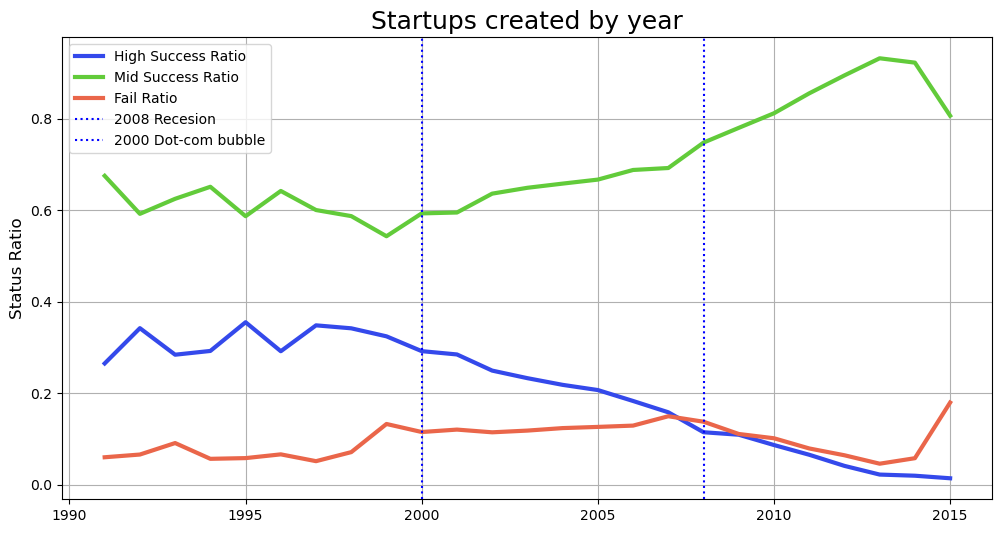

In [42]:
plt.figure(figsize=(12,6))
plt.title('Startups created by year', size=18)
plt.ylabel('Status Ratio',size=12)
plt.plot(year_status[year_status.index < 2016].index,year_status[year_status.index < 2016].high_success_ratio,
         label='High Success Ratio',color='#3449eb',linewidth=3)
plt.plot(year_status[year_status.index < 2016].index,year_status[year_status.index < 2016].mid_success_ratio,
         label='Mid Success Ratio',color='#62CB3A',linewidth=3)
plt.plot(year_status[year_status.index < 2016].index,year_status[year_status.index < 2016].fail_ratio,
         label='Fail Ratio',color='#EA664A',linewidth=3)
plt.axvline(x=2008, color="blue", label="2008 Recesion",linestyle=':')
plt.axvline(x=2000, color="blue", label="2000 Dot-com bubble",linestyle=':')
#plt.axhline(df.high.mean(), label='Global Success Ratio', linestyle='-.')
plt.grid()
plt.legend()

We can see a disturbing trend graph of both the percentage of startups that have succeeded and those that have failed over the years, we can see how in both crises, the trend went through an inflection point, in fact, it is just during the 2008 crisis that both trends intersect.

The most distressing thing of all is The clear downward trend in the success rate of startups since its peak in 1997.

# Let's visualize how is the behavior of startups depending on the country

In [43]:
country_status = group_by_status('country')

# Filter by countries with at least 50 startups
countries_most = country_status.total[country_status.total >= 50]
print(f'There are {countries_most.count()} countries with at least 50 startups')

There are 47 countries with at least 50 startups


/var/folders/_1/m8z38xzd6hv4d1hlr0776md00000gn/T/ipykernel_901/4240955786.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  world = top_ten.append(rest_world)


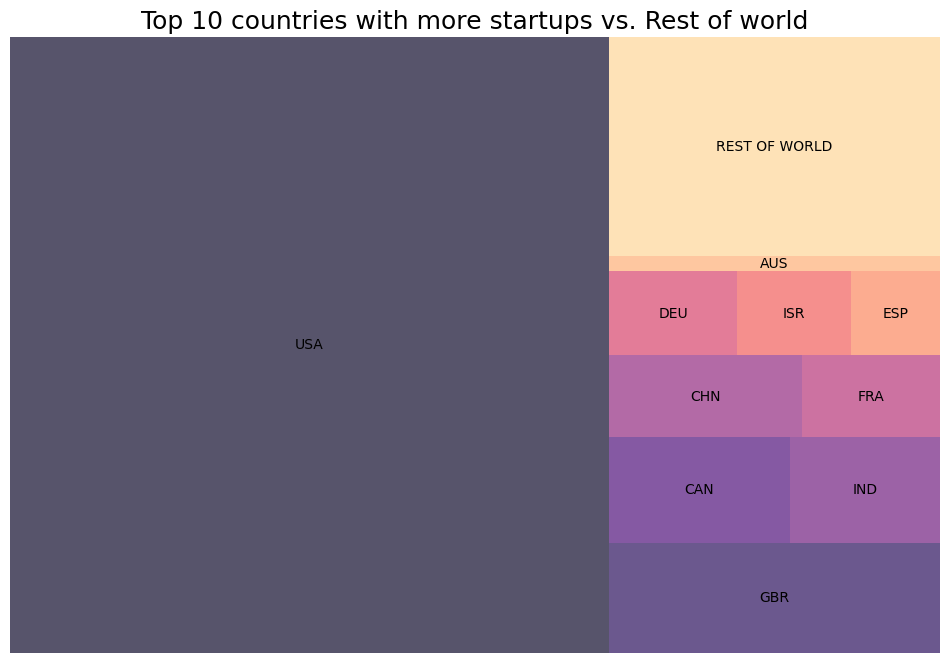

In [44]:
# Let's the proportion of the total startupos by countries
countries_analysis = country_status[country_status.total >= 50]
top_ten = countries_analysis.total.sort_values(ascending=False).head(10)
rest_world = pd.Series(countries_analysis.total.sort_values(ascending=False)[11:].sum(axis=0), index=['REST OF WORLD'])
world = top_ten.append(rest_world)

plt.figure(figsize=(12,8))
plt.title('Top 10 countries with more startups vs. Rest of world', size=18)
squarify.plot(sizes=world, label=world.index, color=sns.color_palette("magma",len(world)), alpha = 0.7)
plt.axis('off')
plt.show()

We can see that there is quite a wide difference between the US and the rest of the countries, in fact only the US represents more than 60% of the dataset, and has 10 times more startups than the second (UK) in the sample.

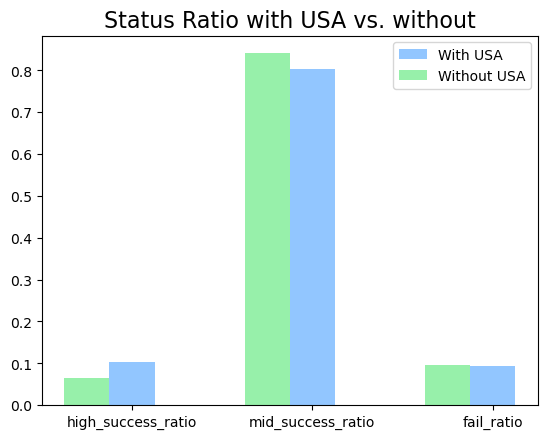

In [45]:
df_nousa = df[df.country != 'USA']

n = len(['high_success_ratio', 'mid_success_ratio','fail_ratio'])
x = np.arange(n)
width = .25

plt.bar(x, df[['high', 'mid','fail']].mean(), width=width, label='With USA')
plt.bar(x - width, df_nousa[['high','mid','fail']].mean(), width=width, label='Without USA')
plt.title('Status Ratio with USA vs. without', size=16)
plt.xticks(x,['high_success_ratio','mid_success_ratio','fail_ratio'])
plt.legend()
plt.show()

A large part of the world success rate is influenced by the success rate in the USA, which is not the case for the failure rate.

/var/folders/_1/m8z38xzd6hv4d1hlr0776md00000gn/T/ipykernel_901/1377090681.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


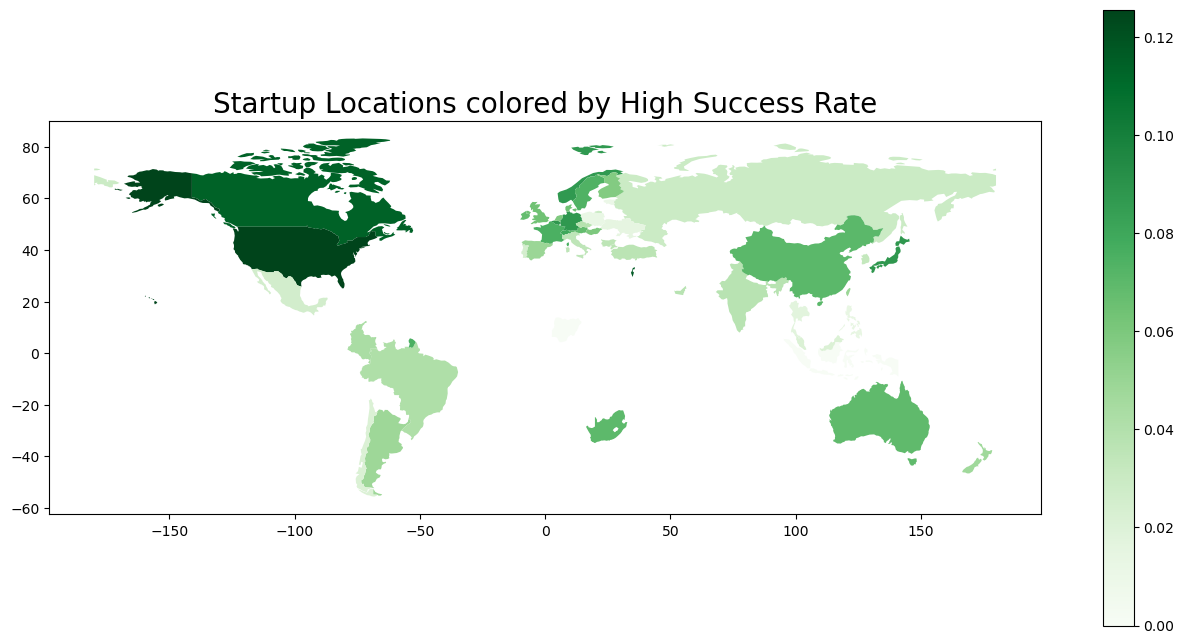

In [46]:
import geopandas as gpd
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
iso_counts = countries_analysis.high_success_ratio.reset_index(name='high_success_ratio')
merged = countries.merge(iso_counts, left_on='iso_a3', right_on='country')
merged.plot(column='high_success_ratio', cmap='Greens', legend=True, figsize=(16,8))
plt.title('Startup Locations colored by High Success Rate',size=20)
plt.show()

/var/folders/_1/m8z38xzd6hv4d1hlr0776md00000gn/T/ipykernel_901/4223244470.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


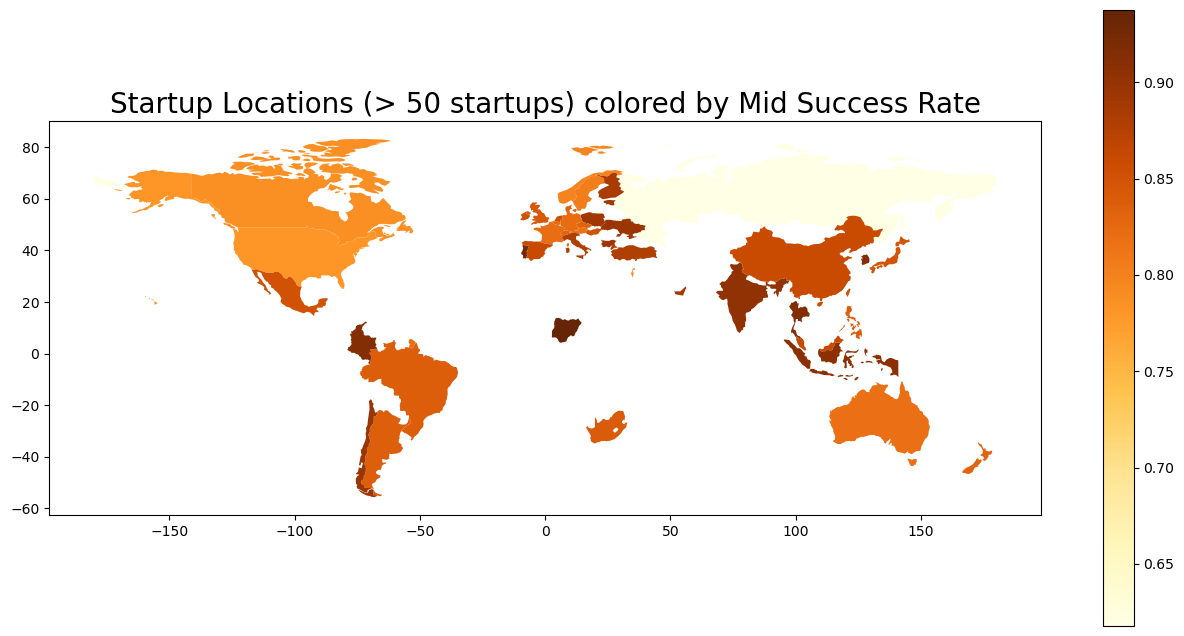

In [47]:
import geopandas as gpd
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
iso_counts = countries_analysis.mid_success_ratio.reset_index(name='mid_success_ratio')
merged = countries.merge(iso_counts, left_on='iso_a3', right_on='country')
merged.plot(column='mid_success_ratio', cmap='YlOrBr', legend=True, figsize=(16,8))
plt.title('Startup Locations (> 50 startups) colored by Mid Success Rate',size=20)
plt.show()

/var/folders/_1/m8z38xzd6hv4d1hlr0776md00000gn/T/ipykernel_901/1924942424.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


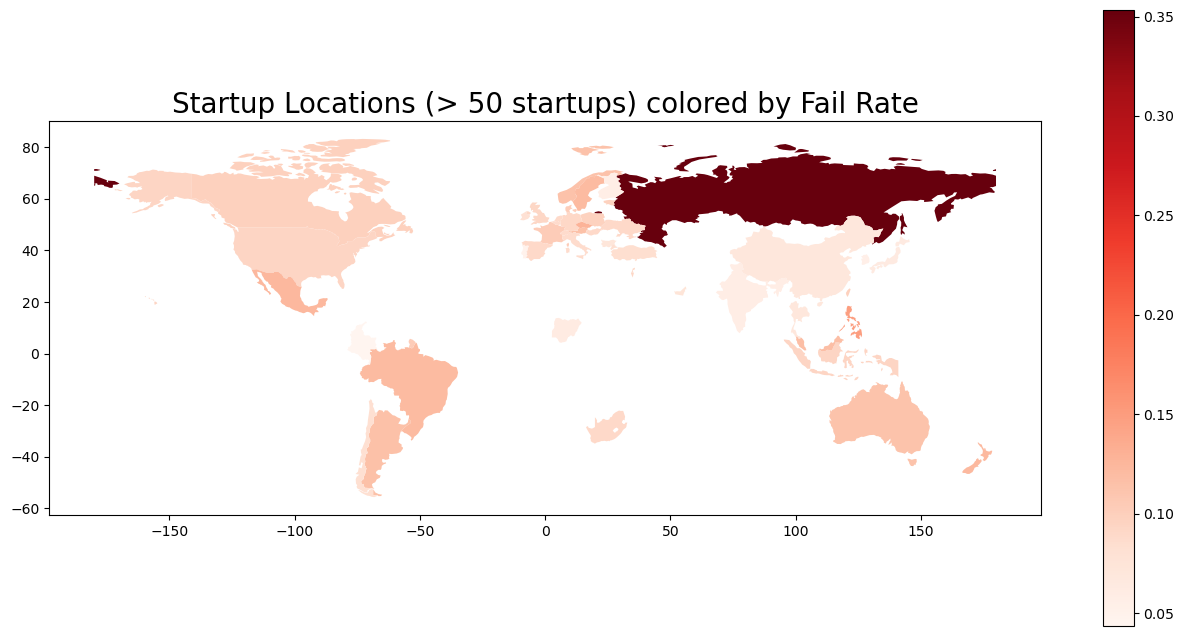

In [48]:
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
iso_counts = countries_analysis.fail_ratio.reset_index(name='fail_ratio')
merged = countries.merge(iso_counts, left_on='iso_a3', right_on='country')
merged.plot(column='fail_ratio', cmap='Reds', legend=True, figsize=(16,8))
plt.title('Startup Locations (> 50 startups) colored by Fail Rate',size=20)
plt.show()

We can see that the vast majority of countries with a high success rate are located between North America and Europe (except for Israel, China and Japan).

On the other hand, we can clearly observe Russia as the country with the highest failure rate of all, being much higher than the rest. Followed by Peru, at a considerable distance.

In [49]:
df.head()

,name,country,year,location,main_category,funding_total_usd,funding_rounds,first_funding_at,last_funding_at,status,status_class,fail,high,mid
0,#fame,IND,2015,Mumbai,Media,10000000.0,1,2015-01-05,2015-01-05,operating,mid,0,0,1
1,:Qounter,USA,2014,"DE - Other, Delaware City",Application Platforms,700000.0,2,2014-03-01,2014-10-14,operating,mid,0,0,1
2,"(THE) ONE of THEM,Inc.",USA,2014,NaN,Apps,3406878.0,1,2014-01-30,2014-01-30,operating,mid,0,0,1
3,0-6.com,CHN,2007,Beijing,Curated Web,2000000.0,1,2008-03-19,2008-03-19,operating,mid,0,0,1
4,004 Technologies,USA,2010,"Springfield, Illinois, Champaign",Software,2000000.0,1,2014-07-24,2014-07-24,operating,mid,0,0,1


# MORE PRE PROCESSING

# Convert the dates to datetime format

In [50]:
# Formatting founded_at, first_funding_at, last_funding_at to datetime. If there are errors, convert it to NA
#df['founded_at'] = pd.to_datetime(df['founded_at'], format='%Y-%m-%d', errors='coerce')
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'], format='%Y-%m-%d', errors='coerce')
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'], format='%Y-%m-%d', errors='coerce')

In [51]:
# Create a new feature representing the duration between the first and last funding
df['funding_duration'] = (df['last_funding_at'] - df['first_funding_at']).dt.days

df.head()

,name,country,year,location,main_category,funding_total_usd,funding_rounds,first_funding_at,last_funding_at,status,status_class,fail,high,mid,funding_duration
0,#fame,IND,2015,Mumbai,Media,10000000.0,1,2015-01-05,2015-01-05,operating,mid,0,0,1,0.0
1,:Qounter,USA,2014,"DE - Other, Delaware City",Application Platforms,700000.0,2,2014-03-01,2014-10-14,operating,mid,0,0,1,227.0
2,"(THE) ONE of THEM,Inc.",USA,2014,NaN,Apps,3406878.0,1,2014-01-30,2014-01-30,operating,mid,0,0,1,0.0
3,0-6.com,CHN,2007,Beijing,Curated Web,2000000.0,1,2008-03-19,2008-03-19,operating,mid,0,0,1,0.0
4,004 Technologies,USA,2010,"Springfield, Illinois, Champaign",Software,2000000.0,1,2014-07-24,2014-07-24,operating,mid,0,0,1,0.0


In [52]:
df.isna().sum()

name                    1
country                 0
year                    0
location             7927
main_category           0
funding_total_usd       0
funding_rounds          0
first_funding_at       26
last_funding_at         0
status                  0
status_class            0
fail                    0
high                    0
mid                     0
funding_duration       26
dtype: int64

# VIEWING THE EMPTY CELLS

In [54]:
# View rows with at least one NaN value
df_with_nan = df[df.isnull().any(axis=1)]

df_with_nan.tail(10)

,name,country,year,location,main_category,funding_total_usd,funding_rounds,first_funding_at,last_funding_at,status,status_class,fail,high,mid,funding_duration
66264,Zubka,GBR,2006,NaN,Consulting,3919186.377,1,2007-02-09,2007-02-09,closed,fail,1,0,0,0.0
66270,ZUGGI,SGP,2010,NaN,Search,40000.000,1,2011-06-20,2011-06-20,operating,mid,0,0,1,0.0
66292,zumodrive,USA,2007,NaN,Cloud Computing,2000000.000,1,2007-09-01,2007-09-01,operating,mid,0,0,1,0.0
66298,Zuoyebang,USA,2015,NaN,Other,2000000.000,1,2015-09-03,2015-09-03,operating,mid,0,0,1,0.0
66306,Zurn,CHN,2013,NaN,Social Media,2000000.000,1,2013-12-01,2013-12-01,operating,mid,0,0,1,0.0
66317,ZUUMTEL,USA,2014,NaN,Automotive,300000.000,2,2013-04-01,2014-09-16,closed,fail,1,0,0,533.0
66325,"Zwayo ""On-Demand Valet Parking""",BRA,2014,NaN,Apps,60000.000,1,2014-09-01,2014-09-01,operating,mid,0,0,1,0.0
66333,Zyfin,CAN,2011,NaN,Finance,2000000.000,1,2011-11-01,2011-11-01,operating,mid,0,0,1,0.0
66365,ÁERON,USA,2011,NaN,Other,2000000.000,1,2014-08-01,2014-08-01,operating,mid,0,0,1,0.0
66367,İnovatiff Reklam ve Tanıtım Hizmetleri Tic,USA,2013,NaN,Consumer Goods,14851.000,1,2013-10-01,2013-10-01,operating,mid,0,0,1,0.0


# HANDLING THE MISSING DATA IN LOCATION

In [55]:
# Define your constants for each country
constants = {
    'USA': 'New York City, New York',
    'GBR': 'London',
    'FRA': 'Paris',
    'IND': 'Mumbai',
    'CHN': 'Beijing',
    'ESP': 'Madrid',
    'HKG': 'Hong Kong',
    'ISR': 'Tel Aviv',
    'CAN': 'Toronto',
    'DEU': 'Berlin',
    'AUS': 'Sydney',
    'NLD': 'Amsterdam',
    'RUS': 'Moscow',
    'SGP': 'Singapore',
    'BRA': 'Porto Alegre',
    'JPN': 'Tokyo',
    'NOR': 'Oslo',
    'ITA': 'Turin',
    'SWE': 'Stockholm',
    'KOR': 'Seoul',
    'IRL':'Dublin',
    'CHL': 'Santiago',
    'BEL': 'Brussels, Ghent',
    'TWN': 'Taiwan, Taipei',
    'NZL': 'Auckland',
    'CHE': 'Zurich'
    
    
}

default_value = 'Unknown Location'

# Apply the fillna function with a lambda that uses the country to determine the constant
df['location'] = df.apply(
    lambda row: constants.get(row['country'], default_value) if pd.isnull(row['location']) else row['location'],
    axis=1
)

In [56]:

df['location'] = df['location'].replace('Unknown Location', np.nan)


In [57]:
df.isna().sum()

name                   1
country                0
year                   0
location             521
main_category          0
funding_total_usd      0
funding_rounds         0
first_funding_at      26
last_funding_at        0
status                 0
status_class           0
fail                   0
high                   0
mid                    0
funding_duration      26
dtype: int64

In [58]:
df.dropna(inplace= True)


In [59]:
df.isna().sum()

name                 0
country              0
year                 0
location             0
main_category        0
funding_total_usd    0
funding_rounds       0
first_funding_at     0
last_funding_at      0
status               0
status_class         0
fail                 0
high                 0
mid                  0
funding_duration     0
dtype: int64

In [60]:
df['first_funding_at'].dt.year.unique() >= 2023

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [61]:
df['last_funding_at'].dt.year.unique() >= 2023

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True])

In [62]:
df['last_funding_at'].dt.year.unique()

array([2015, 2014, 2008, 2009, 2013, 2011, 2010, 2006, 2012, 2007, 2004,
       2003, 2005, 2002, 2001, 2000, 1994, 1999, 1998, 1995, 1996, 1997,
       1993, 1992, 1989, 1990, 1986, 2105, 2115])

In [63]:
df.sort_values('last_funding_at', ascending = False)

,name,country,year,location,main_category,funding_total_usd,funding_rounds,first_funding_at,last_funding_at,status,status_class,fail,high,mid,funding_duration
63921,Wigzo Technologies,USA,2014,"New York City, New York",Advertising,600000.0,2,2014-08-18,2115-12-01,operating,mid,0,0,1,36994.0
46956,Rasyonel R&D,TUR,2013,Izmir,Embedded Hardware and Software,220000.0,3,2013-04-05,2105-05-01,closed,fail,1,0,0,33628.0
36653,Modern Movement,USA,2014,Madison,Android,85000.0,2,2014-07-18,2015-12-12,operating,mid,0,0,1,512.0
25637,Hitsbook Inc,ESP,2011,Madrid,Entertainment Industry,1410000.0,3,2014-01-07,2015-12-07,operating,mid,0,0,1,699.0
30484,"Keypair, Inc.",KOR,2012,Seongnam,FinTech,5000000.0,1,2015-12-05,2015-12-05,operating,mid,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22374,GECAD NET,ROM,1999,Bucharest,CAD,1000.0,1,1992-01-01,1992-01-01,operating,mid,0,0,1,0.0
28395,Interhyp,DEU,1999,Munich,Banking,2000000.0,1,1990-09-01,1990-09-01,operating,mid,0,0,1,0.0
46870,RampRate Sourcing Advisors,USA,2000,"Los Angeles, Santa Monica",Consulting,1000000.0,1,1990-01-17,1990-01-17,operating,mid,0,0,1,0.0
26838,iGov,USA,1996,"Washington, D.C., Reston",Information Technology,2000000.0,1,1989-10-30,1989-10-30,operating,mid,0,0,1,0.0


In [64]:
df['last_funding_at'] = df['last_funding_at'].replace('21050501', '20150501')

In [65]:
df['last_funding_at'] = df['last_funding_at'].replace('21150501', '20150501')

# GETTING THE COMPANIES AGE

In [66]:
df['company_age'] = 2023 - df['year']
df.head()

,name,country,year,location,main_category,funding_total_usd,funding_rounds,first_funding_at,last_funding_at,status,status_class,fail,high,mid,funding_duration,company_age
0,#fame,IND,2015,Mumbai,Media,10000000.0,1,2015-01-05,2015-01-05,operating,mid,0,0,1,0.0,8
1,:Qounter,USA,2014,"DE - Other, Delaware City",Application Platforms,700000.0,2,2014-03-01,2014-10-14,operating,mid,0,0,1,227.0,9
2,"(THE) ONE of THEM,Inc.",USA,2014,"New York City, New York",Apps,3406878.0,1,2014-01-30,2014-01-30,operating,mid,0,0,1,0.0,9
3,0-6.com,CHN,2007,Beijing,Curated Web,2000000.0,1,2008-03-19,2008-03-19,operating,mid,0,0,1,0.0,16
4,004 Technologies,USA,2010,"Springfield, Illinois, Champaign",Software,2000000.0,1,2014-07-24,2014-07-24,operating,mid,0,0,1,0.0,13


# Average Funding per round

In [67]:
df['average_funding_per_round'] = df['funding_total_usd'] / df['funding_rounds']
df.head()

,name,country,year,location,main_category,funding_total_usd,funding_rounds,first_funding_at,last_funding_at,status,status_class,fail,high,mid,funding_duration,company_age,average_funding_per_round
0,#fame,IND,2015,Mumbai,Media,10000000.0,1,2015-01-05,2015-01-05,operating,mid,0,0,1,0.0,8,10000000.0
1,:Qounter,USA,2014,"DE - Other, Delaware City",Application Platforms,700000.0,2,2014-03-01,2014-10-14,operating,mid,0,0,1,227.0,9,350000.0
2,"(THE) ONE of THEM,Inc.",USA,2014,"New York City, New York",Apps,3406878.0,1,2014-01-30,2014-01-30,operating,mid,0,0,1,0.0,9,3406878.0
3,0-6.com,CHN,2007,Beijing,Curated Web,2000000.0,1,2008-03-19,2008-03-19,operating,mid,0,0,1,0.0,16,2000000.0
4,004 Technologies,USA,2010,"Springfield, Illinois, Champaign",Software,2000000.0,1,2014-07-24,2014-07-24,operating,mid,0,0,1,0.0,13,2000000.0


# REDUCING THE COUNTRY CODE COLUMN

In [68]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [69]:
country_map = shorten_categories(df.country.value_counts(), 5)
df['country'] = df['country'].map(country_map)
df.country.value_counts()

USA    40821
GBR     4027
CAN     2113
IND     1754
CHN     1745
       ...  
TAN        7
BMU        7
BLR        6
TTO        5
BHR        5
Name: country, Length: 83, dtype: int64

In [70]:
# let's list all categorical features
categorical_columns= [  
        'country'
       ]

# let's get the categories and their count for each feature
for col in categorical_columns:
  print(f"Categories and number of occurrences for '{col}'")
  pretty_print_df(df[col].value_counts())
  print()

Categories and number of occurrences for 'country'


,country
USA,40821
GBR,4027
CAN,2113
IND,1754
CHN,1745
FRA,1248
DEU,1189
ISR,1053
ESP,830
AUS,568


# CREATING A COUNTRY NAME COLUMN

In [71]:
df = df[df['country'] != 'Other']

In [72]:
country_dict = {
    'USA': 'United States',
    'GBR': 'United Kingdom',
    'CAN': 'Canada',
    'IND': 'India',
    'CHN': 'China',
    'FRA': 'France',
    'DEU': 'Germany',
    'ISR': 'Israel',
    'ESP': 'Spain',
    'AUS': 'Australia',
    'NLD': 'Netherlands',
    'RUS': 'Russia',
    'SGP': 'Singapore',
    'SWE': 'Sweden',
    'IRL': 'Ireland',
    'BRA': 'Brazil',
    'JPN': 'Japan',
    'ITA': 'Italy',
    'KOR': 'South Korea',
    'CHE': 'Switzerland',
    'CHL': 'Chile',
    'DNK': 'Denmark',
    'FIN': 'Finland',
    'BEL': 'Belgium',
    'HKG': 'Hong Kong',
    'ARG': 'Argentina',
    'TUR': 'Turkey',
    'POL': 'Poland',
    'MEX': 'Mexico',
    'NOR': 'Norway',
    'AUT': 'Austria',
    'PRT': 'Portugal',
    'IDN': 'Indonesia',
    'BGR': 'Bulgaria',
    'NZL': 'New Zealand',
    'ZAF': 'South Africa',
    'ARE': 'United Arab Emirates',
    'MYS': 'Malaysia',
    'EST': 'Estonia',
    'CZE': 'Czech Republic',
    'PHL': 'Philippines',
    'UKR': 'Ukraine',
    'THA': 'Thailand',
    'NGA': 'Nigeria',
    'TWN': 'Taiwan',
    'COL': 'Colombia',
    'HUN': 'Hungary',
    'PER': 'Peru',
    'LVA': 'Latvia',
    'VNM': 'Vietnam',
    'LTU': 'Lithuania',
    'GRC': 'Greece',
    'KEN': 'Kenya',
    'EGY': 'Egypt',
    'ROM': 'Romania',
    'SVK': 'Slovakia',
    'JOR': 'Jordan',
    'LUX': 'Luxembourg',
    'PAK': 'Pakistan',
    'LBN': 'Lebanon',
    'ISL': 'Iceland',
    'SVN': 'Slovenia',
    'CYP': 'Cyprus',
    'UGA': 'Uganda',
    'GHA': 'Ghana',
    'CYM': 'Cayman Islands',
    'SRB': 'Serbia',
    'URY': 'Uruguay',
    'VEN': 'Venezuela',
    'KHM': 'Cambodia',
    'BGD': 'Bangladesh',
    'CRI': 'Costa Rica',
    'PAN': 'Panama',
    'SAU': 'Saudi Arabia',
    'TAN': 'Tanzania',
    'MLT': 'Malta',
    'HRV': 'Croatia',
    'MUS': 'Mauritius',
    'BLR': 'Belarus',
    'GTM': 'Guatemala',
    'ECU': 'Ecuador',
    'BMU': 'Bermuda',
    'NPL': 'Nepal',
    'TTO': 'Trinidad and Tobago',
    'BHR': 'Bahrain',
    'MKD': 'North Macedonia',
    'LIE': 'Liechtenstein',
}


# Now, create a new column 'country_fullname' by mapping the 'country' column using the dictionary
df['country_name'] = df['country'].map(country_dict)

# If there are any missing values after this operation (if there were any country abbreviations
# not included in your dictionary), you can choose to drop these rows like this:
df = df.dropna(subset=['country_name'])

In [73]:
df.head()

,name,country,year,location,main_category,funding_total_usd,funding_rounds,first_funding_at,last_funding_at,status,status_class,fail,high,mid,funding_duration,company_age,average_funding_per_round,country_name
0,#fame,IND,2015,Mumbai,Media,10000000.0,1,2015-01-05,2015-01-05,operating,mid,0,0,1,0.0,8,10000000.0,India
1,:Qounter,USA,2014,"DE - Other, Delaware City",Application Platforms,700000.0,2,2014-03-01,2014-10-14,operating,mid,0,0,1,227.0,9,350000.0,United States
2,"(THE) ONE of THEM,Inc.",USA,2014,"New York City, New York",Apps,3406878.0,1,2014-01-30,2014-01-30,operating,mid,0,0,1,0.0,9,3406878.0,United States
3,0-6.com,CHN,2007,Beijing,Curated Web,2000000.0,1,2008-03-19,2008-03-19,operating,mid,0,0,1,0.0,16,2000000.0,China
4,004 Technologies,USA,2010,"Springfield, Illinois, Champaign",Software,2000000.0,1,2014-07-24,2014-07-24,operating,mid,0,0,1,0.0,13,2000000.0,United States


In [74]:
counts = df['main_category'].value_counts()

# Now let's create a list of all categories that occur less than 5 times
to_remove = counts[counts < 5].index

# Drop these rows from the DataFrame
df = df[~df['main_category'].isin(to_remove)]

# Now, let's remove the 'others' row
df = df[df['main_category'] != 'others']


In [75]:
# let's list all categorical features
categorical_columns= [  
        'main_category'
       ]

# let's get the categories and their count for each feature
for col in categorical_columns:
  print(f"Categories and number of occurrences for '{col}'")
  pretty_print_df(df[col].value_counts())
  print()

Categories and number of occurrences for 'main_category'


,main_category
Biotechnology,4314
Software,3988
Other,2914
E-Commerce,2692
Advertising,2364
Curated Web,2166
Mobile,1730
Analytics,1619
Apps,1474
Health Care,1387


In [76]:
df.head()

,name,country,year,location,main_category,funding_total_usd,funding_rounds,first_funding_at,last_funding_at,status,status_class,fail,high,mid,funding_duration,company_age,average_funding_per_round,country_name
0,#fame,IND,2015,Mumbai,Media,10000000.0,1,2015-01-05,2015-01-05,operating,mid,0,0,1,0.0,8,10000000.0,India
1,:Qounter,USA,2014,"DE - Other, Delaware City",Application Platforms,700000.0,2,2014-03-01,2014-10-14,operating,mid,0,0,1,227.0,9,350000.0,United States
2,"(THE) ONE of THEM,Inc.",USA,2014,"New York City, New York",Apps,3406878.0,1,2014-01-30,2014-01-30,operating,mid,0,0,1,0.0,9,3406878.0,United States
3,0-6.com,CHN,2007,Beijing,Curated Web,2000000.0,1,2008-03-19,2008-03-19,operating,mid,0,0,1,0.0,16,2000000.0,China
4,004 Technologies,USA,2010,"Springfield, Illinois, Champaign",Software,2000000.0,1,2014-07-24,2014-07-24,operating,mid,0,0,1,0.0,13,2000000.0,United States


In [77]:
df.tail()

,name,country,year,location,main_category,funding_total_usd,funding_rounds,first_funding_at,last_funding_at,status,status_class,fail,high,mid,funding_duration,company_age,average_funding_per_round,country_name
66363,ZZNode Science and Technology,CHN,2012,Beijing,Enterprise Software,1587301.0,1,2012-04-01,2012-04-01,operating,mid,0,0,1,0.0,11,1587301.0,China
66364,Zzzzapp Wireless ltd.,HRV,2012,Split,Advertising,114304.0,4,2011-11-01,2014-03-01,operating,mid,0,0,1,851.0,11,28576.0,Croatia
66365,ÁERON,USA,2011,"New York City, New York",Other,2000000.0,1,2014-08-01,2014-08-01,operating,mid,0,0,1,0.0,12,2000000.0,United States
66366,Ôasys,USA,2014,"SF Bay Area, San Francisco",Consumer Electronics,18192.0,1,2015-01-01,2015-01-01,operating,mid,0,0,1,0.0,9,18192.0,United States
66367,İnovatiff Reklam ve Tanıtım Hizmetleri Tic,USA,2013,"New York City, New York",Consumer Goods,14851.0,1,2013-10-01,2013-10-01,operating,mid,0,0,1,0.0,10,14851.0,United States


# CHECKING FOR CLASS DISTRIBUTION

In [78]:
print("Class distribution:\n", df['status_class'].value_counts())

Class distribution:
 mid     51165
high     6627
fail     5967
Name: status_class, dtype: int64


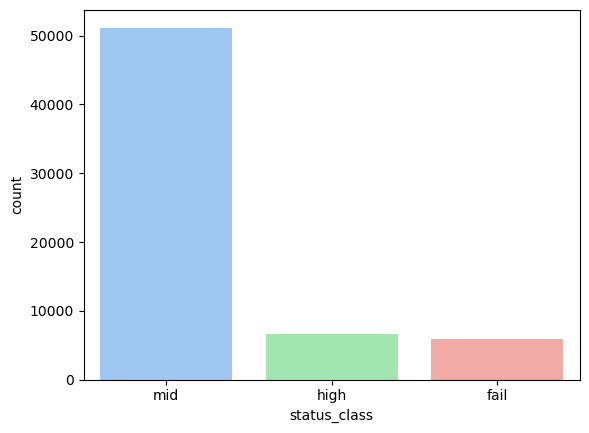

In [79]:
# Visualize class distribution
sns.countplot(x='status_class', data=df)
plt.show()

# ENCODING THE CATEGORICAL DATA

# Label Encoder

In [80]:
from sklearn.preprocessing import LabelEncoder

# Create a label (category) encoder object
le_country_name = LabelEncoder()

le_country_name.fit(df['country_name'])

# View the labels (if you wish)
list(le_country_name.classes_)

# Apply the fitted encoder to the pandas column
df['Country'] = le_country_name.transform(df['country_name']) 


In [81]:
# Create a label (category) encoder object
le_main_category = LabelEncoder()

le_main_category.fit(df['main_category'])

# View the labels (if you wish)
list(le_main_category.classes_)

# Apply the fitted encoder to the pandas column
df['Category'] = le_main_category.transform(df['main_category']) 


In [82]:
# Create a label (category) encoder object
le_status_class = LabelEncoder()

le_status_class.fit(df['status_class'])

# View the labels (if you wish)
list(le_status_class.classes_)

# Apply the fitted encoder to the pandas column
df['Status'] = le_status_class.transform(df['status_class']) 

In [83]:
# Create a label (category) encoder object
le_location = LabelEncoder()

le_location.fit(df['location'])

# View the labels (if you wish)
list(le_location.classes_)

# Apply the fitted encoder to the pandas column
df['Location'] = le_location.transform(df['location']) 

In [84]:
df.head()

,name,country,year,location,main_category,funding_total_usd,funding_rounds,first_funding_at,last_funding_at,status,...,high,mid,funding_duration,company_age,average_funding_per_round,country_name,Country,Category,Status,Location
0,#fame,IND,2015,Mumbai,Media,10000000.0,1,2015-01-05,2015-01-05,operating,...,0,1,0.0,8,10000000.0,India,32,363,2,3354
1,:Qounter,USA,2014,"DE - Other, Delaware City",Application Platforms,700000.0,2,2014-03-01,2014-10-14,operating,...,0,1,227.0,9,350000.0,United States,78,28,2,1147
2,"(THE) ONE of THEM,Inc.",USA,2014,"New York City, New York",Apps,3406878.0,1,2014-01-30,2014-01-30,operating,...,0,1,0.0,9,3406878.0,United States,78,29,2,3704
3,0-6.com,CHN,2007,Beijing,Curated Web,2000000.0,1,2008-03-19,2008-03-19,operating,...,0,1,0.0,16,2000000.0,China,14,156,2,461
4,004 Technologies,USA,2010,"Springfield, Illinois, Champaign",Software,2000000.0,1,2014-07-24,2014-07-24,operating,...,0,1,0.0,13,2000000.0,United States,78,479,2,4833


# FEATURE EXTRACTION

# SEPARATING THE FEATURE AND TARGET VARIABLES

In [86]:
X = df[[ "funding_total_usd", "funding_rounds", "funding_duration", "company_age", 
                  "average_funding_per_round", "Country", "Category", "Location" ]]

y= df["status_class"]


# SCALE THE DATA

In [87]:
from sklearn.preprocessing import StandardScaler

# create an instance of StandardScaler
scaler = StandardScaler()

# fit the scaler to the training data and transform it
X_scaled = scaler.fit_transform(X)

# TRAIN TEST SPLIT

In [88]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.8, random_state=42)

# FIXING CLASS IMBALANCE

In [89]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# VIEWING THE TARGET AFTER OVERSAMPLING

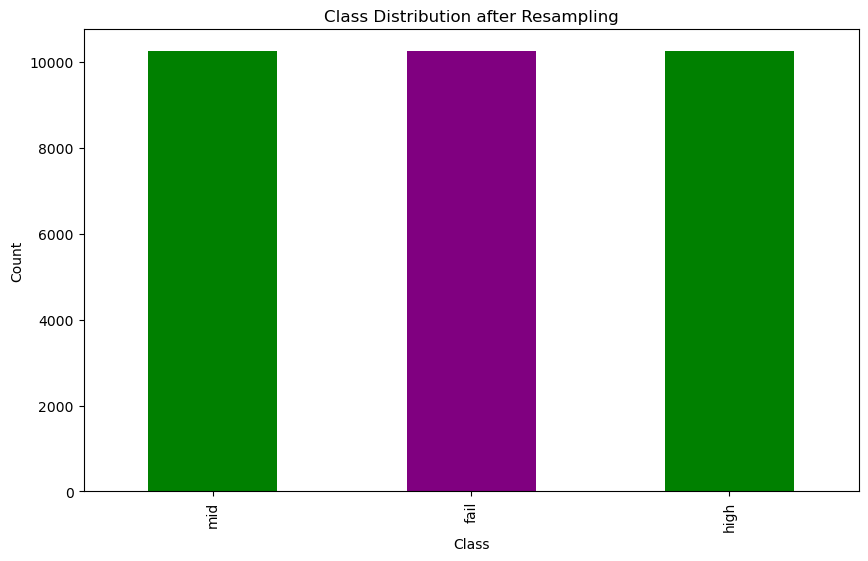

In [90]:
import matplotlib.pyplot as plt

# Get the class distribution of the resampled data
class_distribution = y_resampled.value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar', color=['green', 'purple'])
plt.title('Class Distribution after Resampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


# CLASSIFICATION

# CREATING A FUNCTION TO EVALUATE THE MODEL PERFORMANCE

In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluate_model_performance(model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Calculating the performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print performance metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    print("Classification Report:\n", classification_report(y_test, y_pred))

 

    # Create confusion matrix and display it as a heatmap
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()


# TRIVAL BASELINE

/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.09339711417816814
Precision: 0.008723020936809775
Recall: 0.09339711417816814
F1 Score: 0.015955814815491392


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

        fail       0.09      1.00      0.17      4764
        high       0.00      0.00      0.00      5321
         mid       0.00      0.00      0.00     40923

    accuracy                           0.09     51008
   macro avg       0.03      0.33      0.06     51008
weighted avg       0.01      0.09      0.02     51008



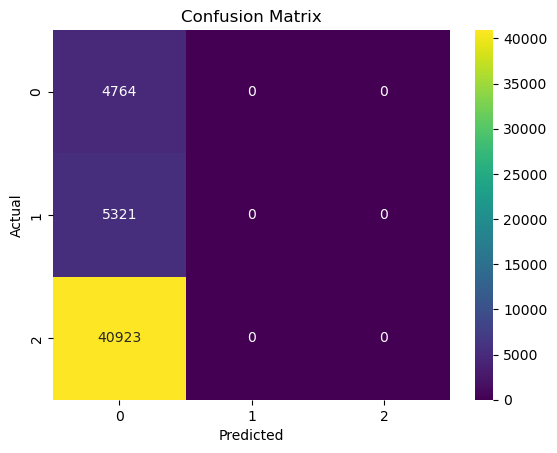

In [92]:
from sklearn.dummy import DummyClassifier

baseline = DummyClassifier(strategy= "prior")

# Fit the baseline model on the resampled data
baseline.fit(X_resampled, y_resampled)

# Predict on the test data
pred = baseline.predict(X_test)

# Evaluate model performance
evaluate_model_performance(baseline, X_test, y_test)


# Binary classsification without grid sesarch

# RF NO GRID SEARCH

Random Forest Results:
Accuracy: 0.7049286386449184
Precision: 0.7353105546464338
Recall: 0.7049286386449184
F1 Score: 0.7183866187960006
Classification Report:
               precision    recall  f1-score   support

        fail       0.19      0.22      0.20      4764
        high       0.30      0.41      0.35      5321
         mid       0.86      0.80      0.83     40923

    accuracy                           0.70     51008
   macro avg       0.45      0.48      0.46     51008
weighted avg       0.74      0.70      0.72     51008



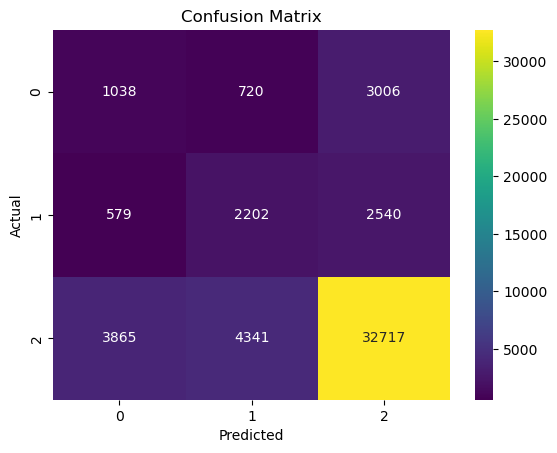

In [93]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier (random_state=42)
clf.fit(X_resampled, y_resampled)
print("Random Forest Results:")
rf_results = evaluate_model_performance(clf, X_test, y_test)

# DT NO GRID SEARCH

Accuracy: 0.651564460476788
Precision: 0.7154091220165273
Recall: 0.651564460476788
F1 Score: 0.6789877857620606
Classification Report:
               precision    recall  f1-score   support

        fail       0.16      0.25      0.20      4764
        high       0.23      0.32      0.27      5321
         mid       0.84      0.74      0.79     40923

    accuracy                           0.65     51008
   macro avg       0.41      0.44      0.42     51008
weighted avg       0.72      0.65      0.68     51008



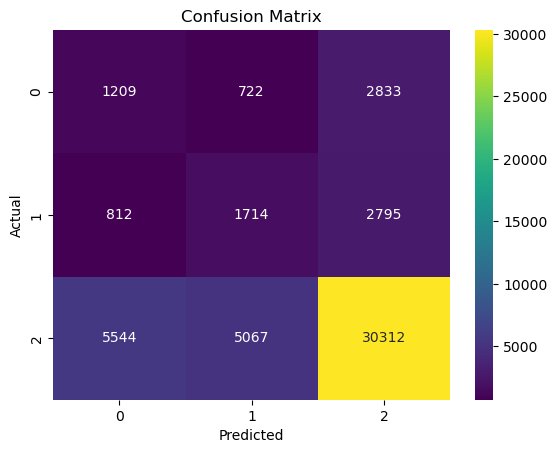

In [94]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier(random_state=42)
clf1.fit(X_resampled, y_resampled)
dt_results = evaluate_model_performance(clf1, X_test, y_test)

# CLASSIFICATION WITH GRID SEARCH

# RANDOM FOREST

In [150]:
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
warnings.simplefilter("ignore")

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # minimum number of samples required to be at a leaf node
}

# Create a base model
rf = RandomForestClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                          cv=3, n_jobs=-1, verbose=2, scoring='f1_macro')

# Fit the grid search to the data
grid_search.fit(X_resampled, y_resampled)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionW

/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionW

/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionW

/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionW

/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionW

/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionW

/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionW

/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionW

/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionW

/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionW

/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionW

/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionW

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


Accuracy: 0.7020709130844054
Precision: 0.7360720909331802
Recall: 0.7020709130844054
F1 Score: 0.7170658296436172
Classification Report:
               precision    recall  f1-score   support

        fail       0.20      0.25      0.23      1202
   operating       0.85      0.79      0.82     10177
     success       0.32      0.43      0.37      1369

    accuracy                           0.70     12748
   macro avg       0.46      0.49      0.47     12748
weighted avg       0.74      0.70      0.72     12748



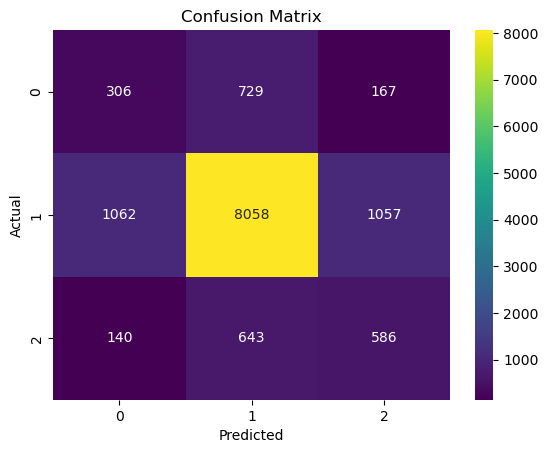

In [151]:
# Get the best model
best_rf = grid_search.best_estimator_

# Evaluate its performance
evaluate_model_performance(best_rf, X_test, y_test)


# Decision Tree

In [155]:
from sklearn.tree import DecisionTreeClassifier
param_grid = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_features": ["auto","sqrt", "log2"], 
    "splitter":["best", "random"]
}

dt = DecisionTreeClassifier()

grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring='accuracy', refit=True)
grid = grid.fit(X_resampled, y_resampled)

print('Best estimator:', grid.best_estimator_)
print('Best params:', grid.best_params_)
print('Best Score:', grid.best_score_)

# get feature importance of the best estimator
feature_importance = grid.best_estimator_.feature_importances_
print('Feature importance:', feature_importance)

Best estimator: DecisionTreeClassifier(criterion='entropy', max_features='log2',
                       splitter='random')
Best params: {'criterion': 'entropy', 'max_features': 'log2', 'splitter': 'random'}
Best Score: 0.7672513246303134
Feature importance: [0.07384201 0.14925732 0.17860134 0.22571235 0.06653312 0.12543313
 0.05276844 0.12785229]


Decision Tree Results:
Accuracy: 0.6291967367430185
Precision: 0.713626283329447
Recall: 0.6291967367430185
F1 Score: 0.6636701517832765
Classification Report:
               precision    recall  f1-score   support

        fail       0.16      0.29      0.21      1202
   operating       0.84      0.71      0.77     10177
     success       0.24      0.35      0.28      1369

    accuracy                           0.63     12748
   macro avg       0.41      0.45      0.42     12748
weighted avg       0.71      0.63      0.66     12748



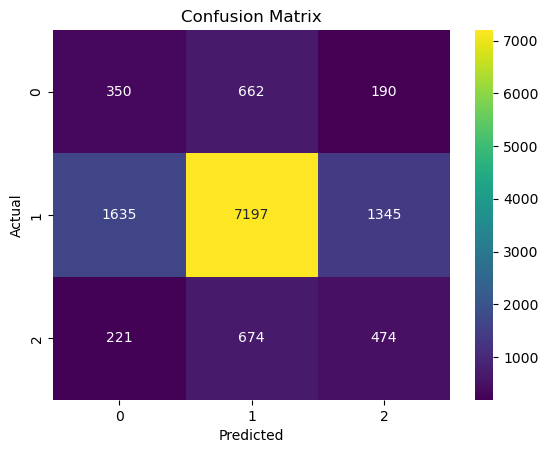

In [156]:
dt = grid.best_estimator_
print("Decision Tree Results:")
dt_results = evaluate_model_performance(dt, X_test, y_test)

# K-Nearest Neighbors

In [157]:
import warnings
warnings.simplefilter("ignore")
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    "n_neighbors": list(range(1, 31)),  
    "weights": ["uniform", "distance"],  
    "metric": ["euclidean", "manhattan", "minkowski"] 
}

knn = KNeighborsClassifier()

grid = GridSearchCV(estimator=knn, param_grid=param_grid, cv=10, scoring='accuracy', refit=True)
grid = grid.fit(X_resampled, y_resampled)

print('Best estimator:', grid.best_estimator_)
print('Best params:', grid.best_params_)
print('Best Score:', grid.best_score_)


Best estimator: KNeighborsClassifier(metric='manhattan', n_neighbors=2, weights='distance')
Best params: {'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}
Best Score: 0.8635803729149444


K-Nearest Neighbors Results:
Accuracy: 0.6630059617194854
Precision: 0.7104076869337967
Recall: 0.6630059617194854
F1 Score: 0.6840139638373116
Classification Report:
               precision    recall  f1-score   support

        fail       0.17      0.26      0.21      1202
   operating       0.84      0.76      0.80     10177
     success       0.24      0.30      0.27      1369

    accuracy                           0.66     12748
   macro avg       0.42      0.44      0.42     12748
weighted avg       0.71      0.66      0.68     12748



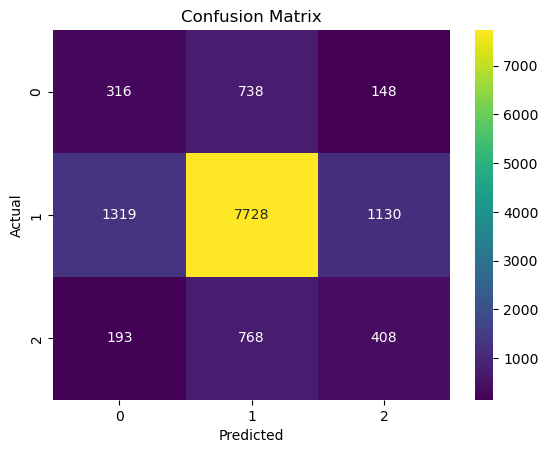

In [158]:
# K-Nearest Neighbors
knn = grid.best_estimator_
knn.fit(X_resampled, y_resampled)
print("K-Nearest Neighbors Results:")
knn_results = evaluate_model_performance(knn, X_test, y_test)

# LOGISTIC REGRESSION

In [159]:
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

warnings.simplefilter("ignore")

param_grid = {
    'C': np.logspace(-4, 4, 20),  
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
    'max_iter': [20000],
    'class_weight': ['balanced']
}

lr = LogisticRegression()

grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv=10, scoring='accuracy', refit=True)
grid = grid.fit(X_resampled, y_resampled)

print('Best estimator: {}\nWeights: {}, Intercept: {}\nBest params: {}'.format(
    grid.best_estimator_, grid.best_estimator_.coef_, grid.best_estimator_.intercept_, grid.best_params_))

Best estimator: LogisticRegression(C=0.0001, class_weight='balanced', max_iter=20000,
                   solver='liblinear')
Weights: [[ 0.00388048  0.03555696  0.08848289 -0.13660123 -0.18602866 -0.06534355
  -0.20963485 -0.05357661]
 [-0.08848049 -0.09781936 -0.02626581 -0.4374645   0.0016219  -0.05031765
  -0.0010432  -0.05150646]
 [ 0.06495651  0.03972993 -0.0745542   0.45036073  0.16561116  0.08837117
   0.17669214  0.09242945]], Intercept: [-0.49531324 -0.43569202 -0.65025837]
Best params: {'C': 0.0001, 'class_weight': 'balanced', 'max_iter': 20000, 'solver': 'liblinear'}


Logistic Regression Results:
Accuracy: 0.4964700345152181
Precision: 0.7551578858570281
Recall: 0.4964700345152181
F1 Score: 0.5606816366024007
Classification Report:
               precision    recall  f1-score   support

        fail       0.14      0.44      0.21      1202
   operating       0.90      0.48      0.63     10177
     success       0.25      0.64      0.36      1369

    accuracy                           0.50     12748
   macro avg       0.43      0.52      0.40     12748
weighted avg       0.76      0.50      0.56     12748



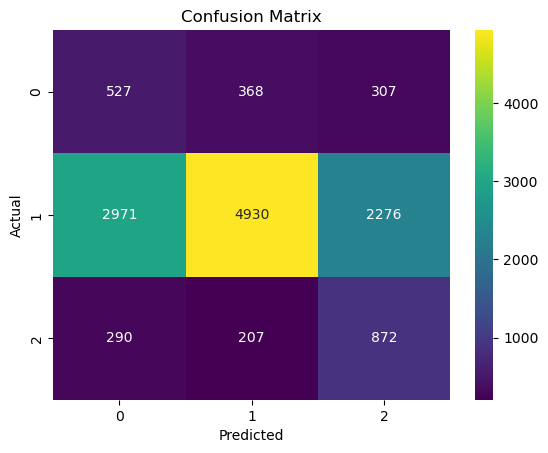

In [160]:
log_reg = grid.best_estimator_
log_reg.fit(X_resampled, y_resampled)
print("Logistic Regression Results:")
log_reg_results = evaluate_model_performance(log_reg, X_test, y_test)


# NEURAL NETWORK

In [161]:
pip install scikeras

Note: you may need to restart the kernel to use updated packages.


In [162]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [163]:
from scikeras.wrappers import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras import models
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.losses import binary_crossentropy
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras import datasets, layers, models


def one_layer_model(num_of_input_features, hidden_layer_nodes=20):
    """ 
    We wrap the model into a function for better usability.
    We make some of the important hyper-parameters, like the learning rate, 
    as arguments to the function. This way we can test different values for these
    hyperparameters without having to change the hard-coded model itself.
    """
    # create a simple model with ONE hidden layer only
    model = models.Sequential()
    # we create a hidden layer with 20 nodes. 
    # Here we can directly give it the input shape. Otherwise we can also create a separate input layer
    model.add(layers.Dense(hidden_layer_nodes, input_dim=num_of_input_features, activation='relu'))
    model.add(layers.Dense(7, activation='softmax')) #is it clear why here we use "sigmoid" and use "softmax" for multi-class problems?
    return model


clf = KerasClassifier(
    model=one_layer_model,
    loss="sparse_categorical_crossentropy",
    model__hidden_layer_nodes=20,
    num_of_input_features= X_train.shape[1],
    epochs= 50,
    batch_size= 64,
    verbose= 0,
    validation_split= 0.2,
    optimizer = "adam",
    optimizer__learning_rate = 0.001,
)

params = {
    'optimizer__learning_rate': [0.01, 0.001],
    'model__hidden_layer_nodes': [20,30,40],
}

gs = GridSearchCV(clf, params, scoring='balanced_accuracy', verbose=True)

gs.fit(X_resampled, y_resampled)


print(gs.best_score_, gs.best_params_)

2023-07-15 02:40:01.382684: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Fitting 5 folds for each of 6 candidates, totalling 30 fits
0.5378127569347532 {'model__hidden_layer_nodes': 40, 'optimizer__learning_rate': 0.001}


Accuracy: 0.6082522748666458
Precision: 0.7644483014306949
Recall: 0.6082522748666458
F1 Score: 0.660128911715179
Classification Report:
               precision    recall  f1-score   support

        fail       0.17      0.60      0.26      1202
   operating       0.88      0.65      0.75     10177
     success       0.40      0.28      0.33      1369

    accuracy                           0.61     12748
   macro avg       0.48      0.51      0.45     12748
weighted avg       0.76      0.61      0.66     12748



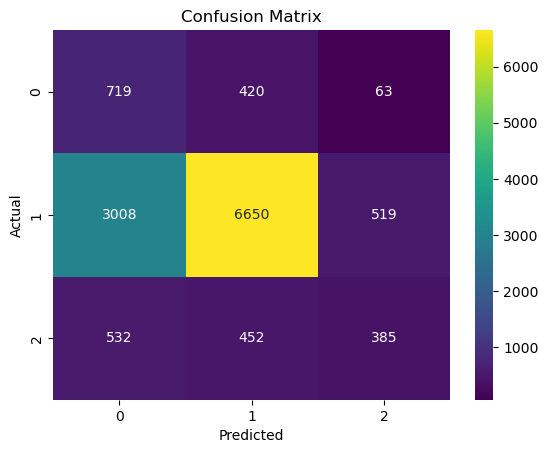

In [164]:

# Check performance on test data
test_probabilities = gs.best_estimator_.predict(X_test)
# let's show the classification report with all the metrics
evaluate_model_performance(gs.best_estimator_, X_test, y_test)

# ENSEMBLE NO GRID SEARCH

Voting Classifier Results:
Accuracy: 0.6481016630059617
Precision: 0.7557165487590817
Recall: 0.6481016630059617
F1 Score: 0.6855748920754581
Classification Report:
               precision    recall  f1-score   support

        fail       0.21      0.36      0.26      1202
   operating       0.88      0.69      0.77     10177
     success       0.29      0.59      0.39      1369

    accuracy                           0.65     12748
   macro avg       0.46      0.54      0.48     12748
weighted avg       0.76      0.65      0.69     12748



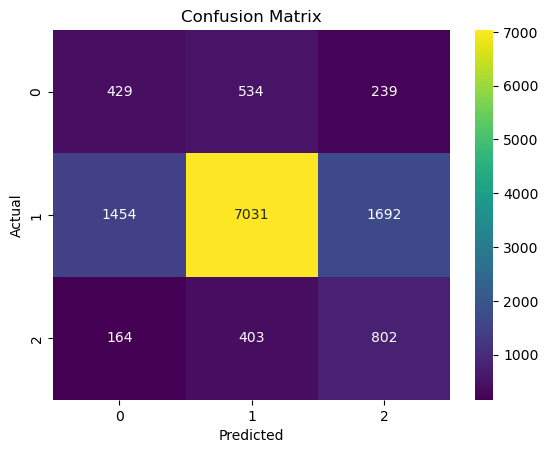

In [165]:
import warnings
warnings.simplefilter("ignore")

from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# create the individual models
clf1 = RandomForestClassifier(random_state=42)
clf2 = SVC(probability=True)  # probability calculation
clf3 = LogisticRegression()

# create the ensemble model
eclf = VotingClassifier(estimators=[('rf', clf1), ('svc', clf2), ('lr', clf3)], voting='soft')

eclf.fit(X_resampled, y_resampled)

print("Voting Classifier Results:")
vc_results = evaluate_model_performance(eclf, X_test, y_test)


In [166]:

np.set_printoptions(threshold=np.inf)
y_pred = eclf.predict(X_test)
y_pred


array(['operating', 'fail', 'operating', 'success', 'success', 'fail',
       'success', 'operating', 'operating', 'operating', 'operating',
       'operating', 'operating', 'operating', 'operating', 'operating',
       'operating', 'operating', 'operating', 'operating', 'operating',
       'operating', 'operating', 'success', 'operating', 'operating',
       'fail', 'success', 'operating', 'operating', 'operating',
       'operating', 'operating', 'operating', 'operating', 'operating',
       'success', 'operating', 'operating', 'operating', 'success',
       'success', 'operating', 'operating', 'success', 'fail',
       'operating', 'operating', 'operating', 'fail', 'operating',
       'operating', 'operating', 'success', 'success', 'operating',
       'operating', 'success', 'operating', 'success', 'operating',
       'operating', 'success', 'fail', 'operating', 'operating',
       'operating', 'operating', 'operating', 'success', 'operating',
       'operating', 'operating', 'opera

# UPDATED ENSEMBLE WITH GRID SEARCH

# BAGGING

/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionW

/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionW

Bagging Results:
Accuracy: 0.7020709130844054
Precision: 0.7360720909331802
Recall: 0.7020709130844054
F1 Score: 0.7170658296436172
Classification Report:
               precision    recall  f1-score   support

        fail       0.20      0.25      0.23      1202
   operating       0.85      0.79      0.82     10177
     success       0.32      0.43      0.37      1369

    accuracy                           0.70     12748
   macro avg       0.46      0.49      0.47     12748
weighted avg       0.74      0.70      0.72     12748



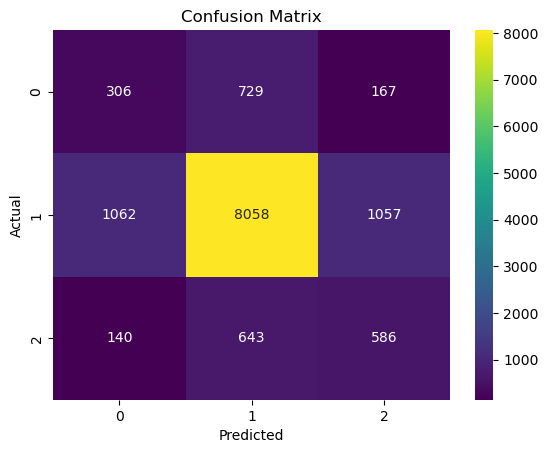

In [172]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameters for the RandomizedSearchCV
params = {'n_estimators': [50, 100, 200],
          'max_depth': [None, 5, 10],
          'min_samples_split': [2, 5]}

# Apply RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(rf, param_distributions=params, cv=3, n_jobs=-1, n_iter=20, random_state=42)
random_search.fit(X_resampled, y_resampled)

print("Bagging Results:")
evaluate_model_performance(random_search.best_estimator_, X_test, y_test)



Best estimator: BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=3),
                  n_estimators=50)
Best params: {'base_estimator__n_neighbors': 3, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 50}
Performance of the model with best parameters:
Accuracy: 0.5982899278318168
Precision: 0.7238349049525943
Recall: 0.5982899278318168
F1 Score: 0.6439922933351583
Classification Report:
               precision    recall  f1-score   support

        fail       0.17      0.36      0.23      1202
   operating       0.86      0.65      0.74     10177
     success       0.23      0.42      0.30      1369

    accuracy                           0.60     12748
   macro avg       0.42      0.48      0.42     12748
weighted avg       0.72      0.60      0.64     12748



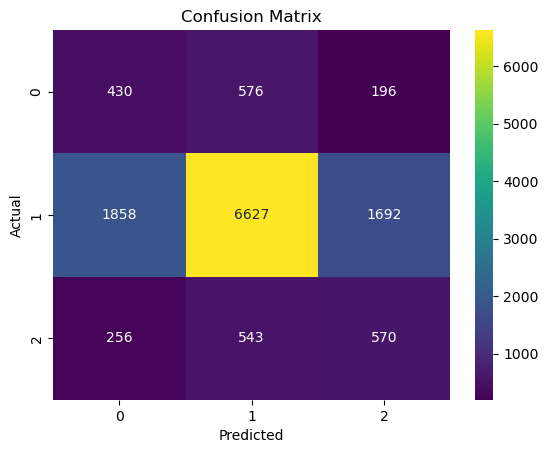

In [175]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Create a BaggingClassifier with KNeighborsClassifier as the base estimator
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

# Define a dictionary of parameters for GridSearchCV
param_grid = {'n_estimators': [10, 20, 50],
              'base_estimator__n_neighbors': [3, 5, 7],
              'max_samples': [0.5, 1.0],
              'max_features': [0.5, 1.0]}

# Setup GridSearchCV with the ensemble model and parameter grid
grid = GridSearchCV(estimator=bagging, param_grid=param_grid, cv=10, scoring='accuracy', refit=True)

# Train the ensemble model
grid = grid.fit(X_resampled, y_resampled)

# Print the best parameters and estimator
print('Best estimator: {}\nBest params: {}'.format(grid.best_estimator_, grid.best_params_))

# Evaluate performance of the model trained with best parameters
print("Performance of the model with best parameters:")
evaluate_model_performance(grid.best_estimator_, X_test, y_test)


# BOOSTING

/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

BOOSTING Results:
Accuracy: 0.7311735174144964
Precision: 0.7263904974577458
Recall: 0.7311735174144964
F1 Score: 0.728608723620627
Classification Report:
               precision    recall  f1-score   support

        fail       0.24      0.24      0.24      1202
   operating       0.84      0.85      0.84     10177
     success       0.33      0.29      0.31      1369

    accuracy                           0.73     12748
   macro avg       0.47      0.46      0.46     12748
weighted avg       0.73      0.73      0.73     12748



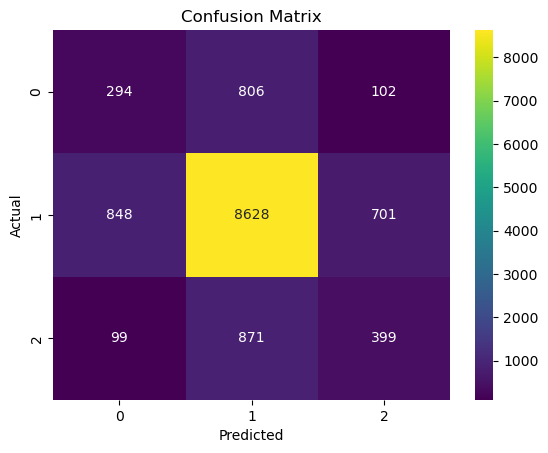

In [173]:
import warnings
warnings.simplefilter("ignore")
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingClassifier(random_state=42)

params = {'n_estimators': [50, 100, 200],
          'max_depth': [3, 5, 7],
          'learning_rate': [0.01, 0.1, 1]}

random_search = RandomizedSearchCV(gb, param_distributions=params, cv=3, n_jobs=-1, n_iter=20, random_state=42)
random_search.fit(X_resampled, y_resampled)


print("BOOSTING Results:")
evaluate_model_performance(random_search.best_estimator_, X_test, y_test)


# STACKING

STACKING Results:
Accuracy: 0.6226074678380923
Precision: 0.7302716883137017
Recall: 0.6226074678380923
F1 Score: 0.663197291396979
Classification Report:
               precision    recall  f1-score   support

        fail       0.18      0.35      0.23      1202
   operating       0.86      0.68      0.76     10177
     success       0.25      0.42      0.32      1369

    accuracy                           0.62     12748
   macro avg       0.43      0.48      0.44     12748
weighted avg       0.73      0.62      0.66     12748



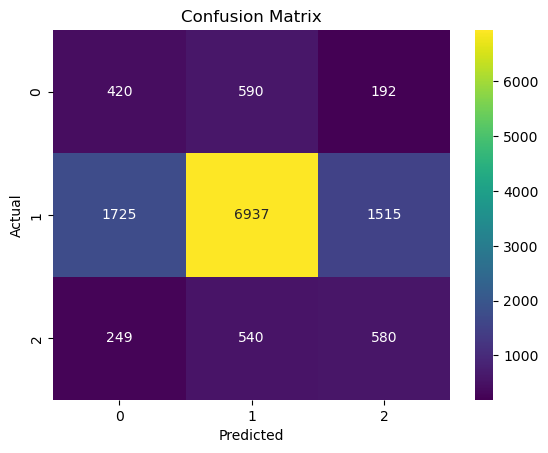

In [176]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

estimators = [
    ('dt', DecisionTreeClassifier(max_depth=5, min_samples_split=2, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5))
]

stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=3)
stacking.fit(X_resampled, y_resampled)


print("STACKING Results:")
evaluate_model_performance(stacking, X_test, y_test)


# VOTING

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1

/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1

Best Parameters:
{'rf__n_estimators': 50, 'rf__min_samples_split': 2, 'rf__max_depth': None, 'knn__weights': 'distance', 'knn__n_neighbors': 5, 'dt__min_samples_split': 5, 'dt__max_depth': None}
Performance of the model with best parameters:
Accuracy: 0.67579228114214
Precision: 0.7243236614944548
Recall: 0.67579228114214
F1 Score: 0.6968670580839567
Classification Report:
               precision    recall  f1-score   support

        fail       0.19      0.28      0.23      1202
   operating       0.85      0.76      0.80     10177
     success       0.27      0.37      0.31      1369

    accuracy                           0.68     12748
   macro avg       0.44      0.47      0.45     12748
weighted avg       0.72      0.68      0.70     12748



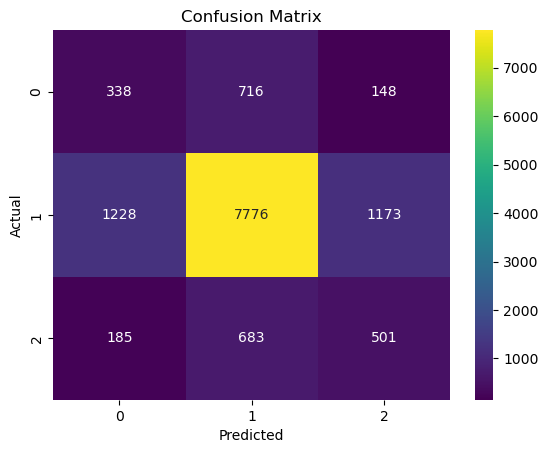

[CV 2/3] END dt__max_depth=5, dt__min_samples_split=2, knn__n_neighbors=5, knn__weights=uniform, rf__max_depth=None, rf__min_samples_split=5, rf__n_estimators=50;, score=0.835 total time=  18.4s
[CV 2/3] END dt__max_depth=5, dt__min_samples_split=2, knn__n_neighbors=5, knn__weights=distance, rf__max_depth=None, rf__min_samples_split=5, rf__n_estimators=50;, score=0.849 total time=  19.3s
[CV 2/3] END dt__max_depth=5, dt__min_samples_split=5, knn__n_neighbors=5, knn__weights=distance, rf__max_depth=None, rf__min_samples_split=2, rf__n_estimators=50;, score=0.850 total time=  22.5s
[CV 1/3] END dt__max_depth=5, dt__min_samples_split=2, knn__n_neighbors=5, knn__weights=distance, rf__max_depth=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.772 total time=  14.4s
[CV 3/3] END dt__max_depth=None, dt__min_samples_split=5, knn__n_neighbors=5, knn__weights=uniform, rf__max_depth=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.800 total time=  14.2s
[CV 1/3] END dt__max_de

[CV 1/3] END dt__max_depth=None, dt__min_samples_split=2, knn__n_neighbors=3, knn__weights=uniform, rf__max_depth=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.768 total time=  10.1s
[CV 1/3] END dt__max_depth=5, dt__min_samples_split=2, knn__n_neighbors=5, knn__weights=distance, rf__max_depth=None, rf__min_samples_split=5, rf__n_estimators=50;, score=0.817 total time=  19.8s
[CV 3/3] END dt__max_depth=None, dt__min_samples_split=2, knn__n_neighbors=3, knn__weights=distance, rf__max_depth=None, rf__min_samples_split=2, rf__n_estimators=100;, score=0.841 total time=  35.7s
[CV 3/3] END dt__max_depth=5, dt__min_samples_split=2, knn__n_neighbors=5, knn__weights=distance, rf__max_depth=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.787 total time=  14.0s
[CV 1/3] END dt__max_depth=None, dt__min_samples_split=5, knn__n_neighbors=5, knn__weights=uniform, rf__max_depth=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.763 total time=  14.7s
[CV 2/3] END dt__ma

In [179]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter("ignore")

# create the individual models
rf = RandomForestClassifier(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()

# create the ensemble model
eclf = VotingClassifier(estimators=[('rf', rf), ('dt', dt), ('knn', knn)], voting='soft')

# define a dictionary of parameters for RandomizedSearchCV
params = {'rf__n_estimators': [50, 100],
          'rf__max_depth': [None, 5],
          'rf__min_samples_split': [2, 5],
          'dt__max_depth': [None, 5],
          'dt__min_samples_split': [2, 5],
          'knn__n_neighbors': [3, 5],
          'knn__weights': ['uniform', 'distance']}

# setup randomized search with the ensemble model and parameter grid
random_search = RandomizedSearchCV(estimator=eclf, param_distributions=params, cv=3, verbose=3, n_jobs=-1, n_iter=10)

# train the ensemble model
random_search = random_search.fit(X_resampled, y_resampled)

# Print the best parameters
print("Best Parameters:")
print(random_search.best_params_)



print("Performance of the model with best parameters:")
evaluate_model_performance(random_search.best_estimator_, X_test, y_test)


# SAVING THE BEST MODEL

In [180]:
import pickle

In [181]:
data = {"model": random_search.best_estimator_, "le_country_name": le_country_name, "le_main_category": le_main_category, "le_location":le_location}
with open('boosting_ensemble.pkl', 'wb') as file:
    pickle.dump(data, file)